In this project, we examine Fandango ratings to see if there is any "rating bias" - meaning, we want to see if Fandango is inflating ratings. In October of 2015, an article showed significant differences between the number of stars displayed to users and the actual rating.

In this project, we will analyze more recent movie ratings data to determine if there has been any change in Fandango's rating system after the 2015 analysis. We have two different data sets:

- The data set used in the 2015 analysis (used to analyze the characteristics of Fandango's rating system *previous* to the 2015 analysis)
- A data set with movie ratings for movies released in 2016 and 2017 (used to analyze the rating system's characteristics *after* the 2015 analysis)

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [316]:
fs_comp = pd.read_csv("fandango_score_comparison.csv")

In [317]:
mv_16_17 = pd.read_csv("movie_ratings_16_17.csv")

In [318]:
fs_comp.shape

(146, 22)

In [319]:
mv_16_17.shape

(214, 15)

In [320]:
pd.options.display.max_columns = 25

In [321]:
fs_comp.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [322]:
mv_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


I will isolate the more critical columns:

In [323]:
modFS_comp = fs_comp[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                      'Fandango_votes', 'Fandango_Difference']]
modMV_16_17 = mv_16_17[['movie', 'year', 'fandango']]

The population of interest for this analysis is: the collection of all movie ratings stored on Fandango's website.

To have a useful analysis, we must have representative (random) samples. 

For the `fandango_score_comparision.csv` file, entries (movies) are selected based on having at least 30 fan reviews on Fandango AND every film has a Rotten Tomatoes rating, RT user rating, Metacritic score, Metacritic User score, and IMDb score (the data from Fandango was pulled on Aug 2015.

For the `movie_ratings_16_17.csv` file, only the most popular 214 movies (with a significant number of votes) from 2016 and 2017 were selected (as of March 2017).

In BOTH cases we do NOT have random sampling, and therefore, these samples are NOT representative of the populations. Furthermore, we have issues with how ratings change over time.

Since these samples are NOT representative of the population of interest, and it is not very reasonable to find new data sets, let's change the goal of our project slightly and adjust the population of interest to match this new goal:

The new population is: the collection of all movies release in 2015, 2016, and 2017 that are popular and have more than 30 fan reviews on Fandango.

Our new goal is to determine if there is any difference in how these popular movies are rated. Specifically, we will compare ratings of popular movie ratings in 2015 to popular movie ratings in 2016/2017.

We now have TWO populations of interest:

- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016

NOTE: The term "popular" is vague and we need to define more clearly what that means for our analysis. We will say that if the movie had 30 fan ratings or more, we consider the movie "popular". With that in mind, we have some checks to perform:

1. Check if both samples contain popular movies
2. One of the data sets does not provide information about the number of fan ratings, which is an issue.
    - Find a quick way to check whether this sample contains enough popular movies to be considered representative
3. You'll notice that some movies were not released in 2015 and 2016. Isolate only the sample points that belong to the populations of interest:
    - Isolate the movies released in 2015 in a separate data set
    - Isolate the movies released in 2016 in another separate data set
    - These are the data sets we will use going forward in the analysis

In [324]:
modFS_comp.head(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [325]:
modMV_16_17.head(10)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


In [326]:
modFS_comp.shape

(146, 5)

NOTE: There are 146 movies in the `modFS_comp` dataframe. Of these 146, let's see how many have 30 or more `Fandango_votes`:

In [327]:
type(modFS_comp['Fandango_votes'][0])

numpy.int64

In [328]:
modFS_comp[modFS_comp['Fandango_votes'] >= 30].shape

(146, 5)

It appears that ALL the 146 movies have 30 or more fan ratings.

The `modMV_16_17` dataframe does NOT have any information regarding fan ratings counts, so we will have to cross-reference the `movie` column with the `FILM` column in the `modFS_comp` dataframe to pull those counts:

In [329]:
modMV_16_17['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

None of these movies were released in 2015, so they are NOT contained in the `modFS_comp` dataframe. How else can I find a "quick" way to check whether this sample of data contains enough popular movies to be considered representative? Wikidpedia? Fandango's website?

We will take a random sample of ten movies from the `modMV_16_17` and check the movies myself on the Fandango website. If 8 or more of the movies sampled have more than 30 fan reviews, we can consider the `modMV_16_17` dataframe representative.

In [330]:
modMV_16_17.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


We have the following fan ratings for these movies:

| Movie | Fan Ratings |
| :---: | :---: |
| Mechanic: Resurrection | 2,247 |
| Warcraft | 7,271 |
| Max Steel | 493 |
| Me Before You | 5,263 |
| Fantastic Beasts | 13,400 |
| Cell | 17 |
| Genius | 127 |
| Sully | 11,877 |
| A Hologram for the King | 500 |
| Captain America: Civil War | 35,057 |

Since 9 out of 10 (90%) movies have more than 30 fan ratings, we will move forward with this data set and assume it is representative for our analysis.

We will now isolate the movies released in 2016 in the `modMV_16_17` dataframe:

In [331]:
modMV_16 = modMV_16_17[modMV_16_17['year'] == 2016]

In [332]:
modMV_16['year'].value_counts()

2016    191
Name: year, dtype: int64

The release year information in the `modFS_comp` dataframe is located in the `FILM` column, so we will need to find a way to "break off" the release year component from the movie title. The release year is identified at the END of the title in parentheses:

In [333]:
titleYear = modFS_comp['FILM'].str.split("(", n=-1, expand=True)

In [334]:
titleYear.head()

,0,1
0,Avengers: Age of Ultron,2015)
1,Cinderella,2015)
2,Ant-Man,2015)
3,Do You Believe?,2015)
4,Hot Tub Time Machine 2,2015)


In [335]:
titleYear[0].head()

0    Avengers: Age of Ultron 
1                 Cinderella 
2                    Ant-Man 
3            Do You Believe? 
4     Hot Tub Time Machine 2 
Name: 0, dtype: object

In [336]:
titleYear[1].head()

0    2015)
1    2015)
2    2015)
3    2015)
4    2015)
Name: 1, dtype: object

In [337]:
type(titleYear)

pandas.core.frame.DataFrame

In [338]:
titleYear.rename(columns={0:'Title', 1:'Year'}, inplace=True)

In [339]:
titleYear.head()

,Title,Year
0,Avengers: Age of Ultron,2015)
1,Cinderella,2015)
2,Ant-Man,2015)
3,Do You Believe?,2015)
4,Hot Tub Time Machine 2,2015)


In [340]:
titleYear['Year'] = titleYear['Year'].str.strip(")")

In [341]:
titleYear.head()

,Title,Year
0,Avengers: Age of Ultron,2015
1,Cinderella,2015
2,Ant-Man,2015
3,Do You Believe?,2015
4,Hot Tub Time Machine 2,2015


In [342]:
titleYear.shape

(146, 2)

In [343]:
modFS_comp.shape

(146, 5)

In [344]:
modFS_comp = pd.concat([modFS_comp, titleYear], axis=1)

In [345]:
modFS_comp.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Title,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,Avengers: Age of Ultron,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,Cinderella,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,Ant-Man,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,Do You Believe?,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,Hot Tub Time Machine 2,2015


In [346]:
modFS_15 = modFS_comp[modFS_comp['Year'] == '2015']

In [347]:
modFS_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Title,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,Avengers: Age of Ultron,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,Cinderella,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,Ant-Man,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,Do You Believe?,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,Hot Tub Time Machine 2,2015


In [348]:
modFS_15['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [349]:
modFS_comp['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

I have isolated only the movies released in 2015 and stored the entries in `modFS_15`. The movies released in 2016 have also been isolated and stored in `modMV_16`.

NOTE: An easier way to do this is:

`modFS_comp['Year'] = modFS_comp['FILM'].str[-5:-1]`

We are now ready to start some analysis by looking at some kernel density plots. We will generate two kernel density plots on the same figure for the distribution of movie ratings of each sample. We customize the such so that:

- There is an appropriate title with larger font size
- There are labels on both the x and y-axis
- There is a legend describing which distribution is for 2015 vs 2016
- The x-axis starts at 0 and ends at 5 (movie ratings)
- x-axis tick labels are: `[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]`
- Add `plt.style.use('fivethirtyeight')` *before* the code that generates the kd plots

Next, we will answer the following questions:

1. What is the shape of each distribution?
2. How do their shapes compare?
3. If their shapes are similar, is there anything that clearly differentiates them?
4. Is there any evidence on the graph that suggests there is a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?
5. Provided there is a difference, can we say anything about the direction of the difference? (Were movies in 2016 rated lower or higher compared to 2015?)

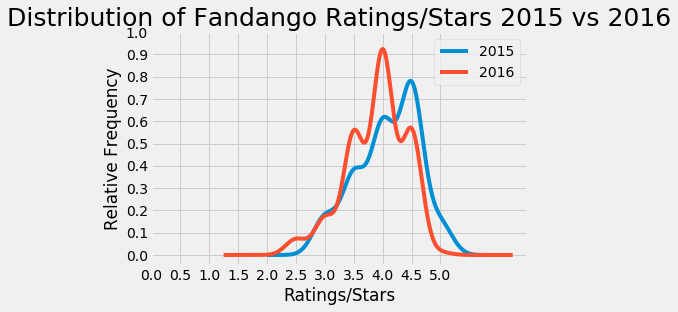

In [350]:
plt.style.use('fivethirtyeight')
modFS_15['Fandango_Stars'].plot.kde(label='2015', legend=True)
modMV_16['fandango'].plot.kde(label='2016', legend=True)
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel('Ratings/Stars')
plt.ylabel('Relative Frequency')
plt.title('Distribution of Fandango Ratings/Stars 2015 vs 2016', fontsize=25)
plt.legend()

1. What is the shape of each distribution? <br>
**ANS:** The 2015 distribution is skewed to the left a bit; the 2016 distribution is much more symmetric/bell-shaped.

2. How do their shapes compare? <br>
**ANS:** The shapes are somewhat different, but not dramatically; the spread is about the same and the centers seem to be rather similar (I'll investigate mean, std. dev., etc. later).

3. If their shapes are similar, is there anything that clearly differentiates them? <br>
**ANS:** The biggest differentiator is that the peak in 2015 is located at 4.5 with a relative frequency of about 0.8 while in 2016 the peak is located at 4.0 with a relative frequency of just over 0.9.

4. Is there any evidence on the graph that suggests there is a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016? <br>
**ANS:** It appears the mean is lower, but this might be attributed to worse movies being made and reflecting the fact that people don't like them.

5. Provided there is a difference, can we say anything about the direction of the difference? (Were movies in 2016 rated lower or higher compared to 2015?) <br>
**ANS:** It appears that movies in 2016 are rated lower on average than movies in 2015

For the next level of the analysis, we will do the following:

1. Examine the frequency distribution tables of the two distributions.
    - Does it make sense to compare the two tables using absolute frequencies given that the samples have different numbers of movies?
    - If absolute frequencies are not useful here, would relative frequencies be more helpful? If so, are percentages or proportions more readable?
    
2. Analyze the two tables and answer the following questions:
    - Is it still clear that there is a difference between the two distributions?
    - What can you tell about the direction of the difference just from the tables? Is the direction still that clear anymore?

In [351]:
modFS_15['Fandango_Stars'].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [352]:
modMV_16['fandango'].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

In [353]:
modFS_15['Fandango_Stars'].value_counts(normalize=True).round(4).sort_index()*100

3.0     8.53
3.5    17.83
4.0    28.68
4.5    37.98
5.0     6.98
Name: Fandango_Stars, dtype: float64

In [354]:
modMV_16['fandango'].value_counts(normalize=True).round(4).sort_index()*100

2.5     3.14
3.0     7.33
3.5    24.08
4.0    40.31
4.5    24.61
5.0     0.52
Name: fandango, dtype: float64

Since there are different numbers of movies in each data set, relative frequencies are likely the best approach rather than absolute frequencies. In terms of readability, I feel percentages are best. With the frequency (absolute or relative), I think it is still clear that there is a difference (shape and center) between the two distributions.

The direction of the difference is more difficult to ascertain than by just looking at a graph. Using these tables, we can still infer that Fandango ratings in 2016 were a bit lower than in 2015, but again, this takes more work to determine than by simply looking at a graph.

Now, we will compute some summary statistics:
- Compute the mean, median, and mode for each distribution
- Compare these metrics and determine what they tell us about the direction of the difference
- What is the magnitude of the difference? Is the difference large or small?
- Generate a grouped bar plot to show comparatively how the mean, median, and mode varied fro 2015 and 2016

In [355]:
mean_15, median_15, mode_15 = modFS_15['Fandango_Stars'].mean(), modFS_15['Fandango_Stars'].median(), modFS_15['Fandango_Stars'].mode()

In [356]:
mean_16, median_16, mode_16 = modMV_16['fandango'].mean(), modMV_16['fandango'].median(), modMV_16['fandango'].mode()

In [357]:
mean_16 - mean_15

-0.19783676285563567

In [358]:
median_16 - median_15

0.0

In [359]:
mode_16 - mode_15

0   -0.5
dtype: float64

In [361]:
type(mode_15)

pandas.core.series.Series

In [362]:
type(mode_16)

pandas.core.series.Series

In [369]:
mode_15[0]

4.5

We see that the medians are the same; however, computing the difference as "(year 2016) - (year 2015)" we see that the difference in means and modes are negative, demonstrating that the 2016 metrics are *smaller* than the 2015 metrics. Again, this matches what we visually saw in our kernel density graphs.

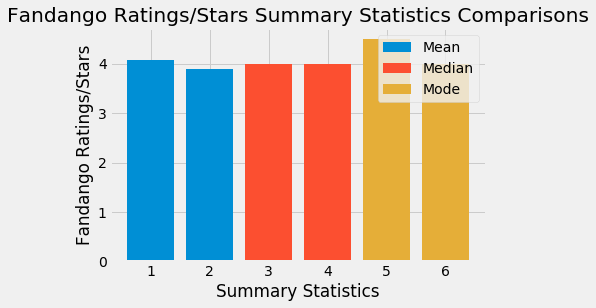

In [371]:
means, medians, modes = (mean_15, mean_16), (median_15, median_16), (mode_15[0], mode_16[0])

fig, ax = plt.subplots()

means_bar = ax.bar(x=[1,2], height=means, label='Mean')
medians_bar = ax.bar(x=[3,4], height=medians, label='Median')
modes_bar = ax.bar(x=[5,6], height=modes, label='Mode')

ax.set_ylabel('Fandango Ratings/Stars')
ax.set_xlabel('Summary Statistics')
ax.set_title('Fandango Ratings/Stars Summary Statistics Comparisons')
ax.legend()

plt.show()

A cleaner idea is to put all the summary statistics in their own dataframe:

In [372]:
summary = pd.DataFrame()

In [381]:
summary['2015'] = [mean_15, median_15, mode_15[0]]
summary['2016'] = [mean_16, median_16, mode_16[0]]
summary.index = ['Mean', 'Median', 'Mode']

In [382]:
summary

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


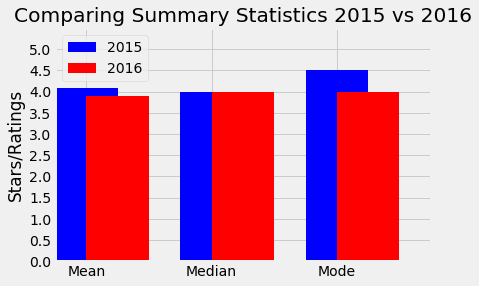

In [390]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color='b', align='center')
summary['2016'].plot.bar(color='r', align='edge')

plt.title('Comparing Summary Statistics 2015 vs 2016')
plt.ylim(0, 5.5)
plt.yticks(np.arange(0, 5.5, step=0.5))
plt.ylabel('Stars/Ratings')
plt.xticks([0,1,2], ['Mean', 'Median', 'Mode'], rotation=0)
plt.legend()
plt.show()

For some next steps here are some ideas:

1. Customize the graphs further
2. Use these two samples to compare ratings of different movie ratings aggregators and recommend which is the best to check for a movie rating
3. Collect recent movie ratings data and formulate my own research questions